In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PowerTransformer, StandardScaler, label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, RocCurveDisplay
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 40)

In [17]:
df = pd.read_csv('credit_ds.csv', low_memory=False)

In [18]:
df.drop(columns=["Credit_Score_Label", "ID", "Customer_ID", "Name", "SSN"], inplace=True)

In [19]:
df.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [5]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2
1,February,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",-1.0,7.0,11.27,4.0,Good,809.98,31.944960,266,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,2
2,March,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,2
3,April,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,2
4,May,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,2


In [5]:
numerical_df = df.select_dtypes(include=["int64", "float64"])

In [6]:
def analyze_skewness(data, column):
    skewness = data[column].skew()
    if abs(skewness) > 1:
        return f"Highly skewed (Skewness={skewness:.2f})"
    elif 0.5 < abs(skewness) <= 1:
        return f"Moderately skewed (Skewness={skewness:.2f})"
    else:
        return f"Symmetrical (Skewness={skewness:.2f})"


In [7]:
for column in numerical_df.columns:
    if column != 'Credit_Score':
        skewness_analysis = analyze_skewness(df, column)
        print(f"Feature: {column}")
        print(f"- {skewness_analysis}\n")

Feature: Age
- Symmetrical (Skewness=0.21)

Feature: Annual_Income
- Highly skewed (Skewness=1.11)

Feature: Monthly_Inhand_Salary
- Highly skewed (Skewness=1.11)

Feature: Num_Bank_Accounts
- Symmetrical (Skewness=-0.16)

Feature: Num_Credit_Card
- Symmetrical (Skewness=0.22)

Feature: Interest_Rate
- Moderately skewed (Skewness=0.54)

Feature: Num_of_Loan
- Symmetrical (Skewness=0.49)

Feature: Delay_from_due_date
- Moderately skewed (Skewness=1.00)

Feature: Num_of_Delayed_Payment
- Symmetrical (Skewness=-0.18)

Feature: Changed_Credit_Limit
- Moderately skewed (Skewness=0.68)

Feature: Num_Credit_Inquiries
- Symmetrical (Skewness=0.43)

Feature: Outstanding_Debt
- Highly skewed (Skewness=1.26)

Feature: Credit_Utilization_Ratio
- Symmetrical (Skewness=0.03)

Feature: Credit_History_Age
- Symmetrical (Skewness=-0.10)

Feature: Total_EMI_per_month
- Highly skewed (Skewness=1.85)

Feature: Amount_invested_monthly
- Highly skewed (Skewness=4.30)

Feature: Monthly_Balance
- Highly skewe

In [8]:
df.select_dtypes(include='object')

,Month,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour
0,January,Scientist,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",Good,No,High_spent_Small_value_payments
1,February,Scientist,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",Good,No,Low_spent_Large_value_payments
2,March,Scientist,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",Good,No,Low_spent_Medium_value_payments
3,April,Scientist,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",Good,No,Low_spent_Small_value_payments
4,May,Scientist,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",Good,No,High_spent_Medium_value_payments
...,...,...,...,...,...,...
94118,April,Mechanic,"['Auto Loan', 'Student Loan']",Good,No,High_spent_Large_value_payments
94119,May,Mechanic,"['Auto Loan', 'Student Loan']",Good,No,High_spent_Medium_value_payments
94120,June,Mechanic,"['Auto Loan', 'Student Loan']",Good,No,High_spent_Large_value_payments
94121,July,Mechanic,"['Auto Loan', 'Student Loan']",Good,No,Low_spent_Large_value_payments


In [9]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2
1,February,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",-1.0,7.0,11.27,4.0,Good,809.98,31.944960,266,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,2
2,March,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,2
3,April,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,2
4,May,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,2


In [10]:
### Feature Engineering of Categorical columns

# Define the mapping for ordinal encoding
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8
}

# Apply the mapping to the Month column
df['Month'] = df['Month'].map(month_mapping)

# One-hot encode the Occupation column
df = pd.get_dummies(df, columns=['Occupation'], prefix='Occupation')

# Step 1: Encode `Credit_Mix` (Ordinal Encoding)
credit_mix_mapping = {'Good': 3, 'Standard': 2, 'Bad': 1}
df['Credit_Mix'] = df['Credit_Mix'].map(credit_mix_mapping)

# Step 2: Encode `Payment_of_Min_Amount` (Binary Encoding)
payment_min_mapping = {'Yes': 1, 'No': 0}
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].map(payment_min_mapping)

# Step 3: Encode `Payment_Behaviour` (Ordinal Encoding)
payment_mapping = {
    'High_spent_Large_value_payments': 6,
    'High_spent_Medium_value_payments': 5,
    'High_spent_Small_value_payments': 4,
    'Low_spent_Large_value_payments': 3,
    'Low_spent_Medium_value_payments': 2,
    'Low_spent_Small_value_payments': 1
}
df['Payment_Behaviour'] = df['Payment_Behaviour'].map(payment_mapping)

# Step 4: Process `Type_of_Loan`
# Define unique loan types
unique_loan_types = [
    'Auto Loan', 'Credit-Builder Loan', 'Debt Consolidation Loan', 
    'Home Equity Loan', 'Mortgage Loan', 'No Loan', 
    'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan'
]

# Add a new column for each unique loan type
for loan_type in unique_loan_types:
    cleaned_loan_type = loan_type.replace(' ', '_').replace('-', '_').lower()
    df[cleaned_loan_type] = df['Type_of_Loan'].apply(lambda x: x.count(loan_type) if isinstance(x, str) else 0)

# Drop the original `Type_of_Loan` column
df = df.drop(columns=['Type_of_Loan'], errors='ignore')

# Verify the resulting dataset
print("Final Dataset Shape After Encoding:", df.shape)

Final Dataset Shape After Encoding: (94123, 47)


In [11]:
# Modeling the data

# Separate features and target
X = df.drop(columns=['Credit_Score'])  # Assuming 'Credit_Score' is your target
y = df['Credit_Score']

# Split the dataset into training and testing sets (75:25 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# List of skewed numerical features identified earlier
skewed_features = ['Annual_Income', 'Monthly_Inhand_Salary','Outstanding_Debt', 'Total_EMI_per_month','Monthly_Balance', 'Amount_invested_monthly']

# Initialize PowerTransformer for skewed features
pt = PowerTransformer(method='yeo-johnson')

# Apply PowerTransformer only on the training set, then transform the test set using the same parameters
X_train[skewed_features] = pt.fit_transform(X_train[skewed_features])
X_test[skewed_features] = pt.transform(X_test[skewed_features])

# Initialize StandardScaler for scaling
scaler = StandardScaler()

# Apply scaling to the entire training set, then transform the test set using the same parameters
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrames for usability
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)


Evaluating KNN...


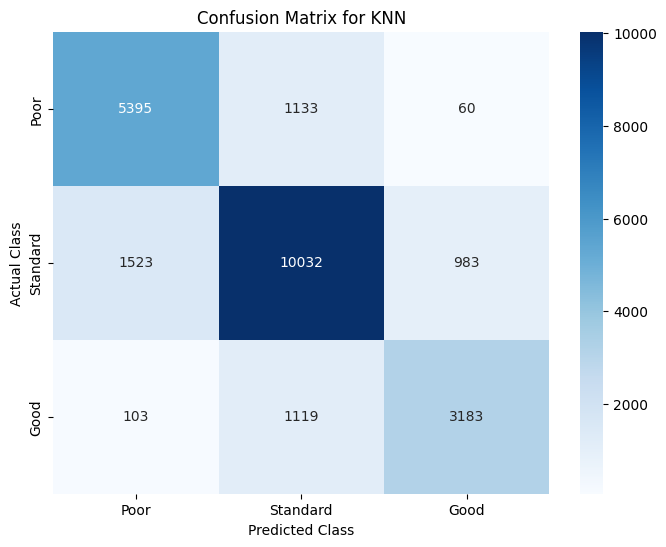

Classification Report for KNN:
              precision    recall  f1-score   support

        Poor       0.77      0.82      0.79      6588
    Standard       0.82      0.80      0.81     12538
        Good       0.75      0.72      0.74      4405

    accuracy                           0.79     23531
   macro avg       0.78      0.78      0.78     23531
weighted avg       0.79      0.79      0.79     23531

Evaluating Logistic Regression...


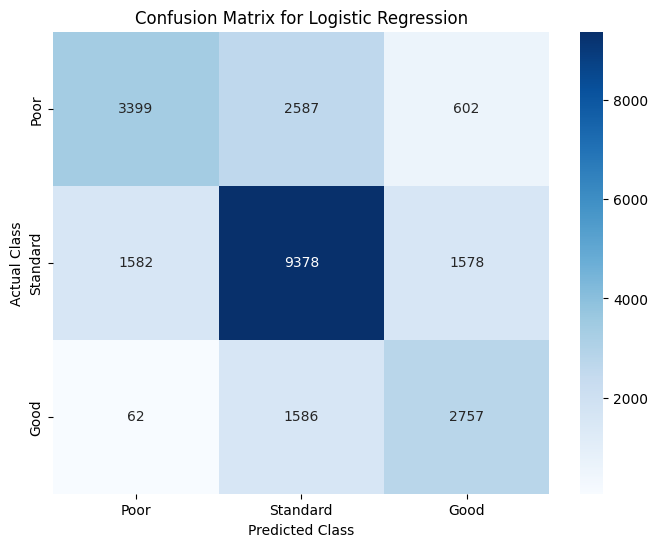

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

        Poor       0.67      0.52      0.58      6588
    Standard       0.69      0.75      0.72     12538
        Good       0.56      0.63      0.59      4405

    accuracy                           0.66     23531
   macro avg       0.64      0.63      0.63     23531
weighted avg       0.66      0.66      0.66     23531

Evaluating Random Forest...


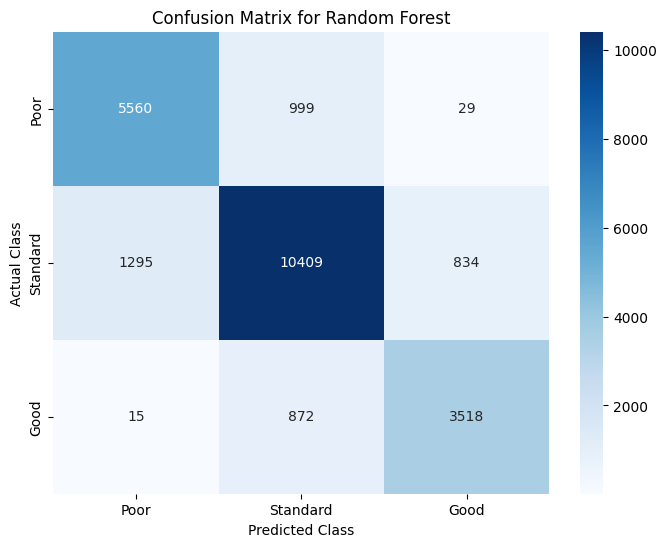

Classification Report for Random Forest:
              precision    recall  f1-score   support

        Poor       0.81      0.84      0.83      6588
    Standard       0.85      0.83      0.84     12538
        Good       0.80      0.80      0.80      4405

    accuracy                           0.83     23531
   macro avg       0.82      0.82      0.82     23531
weighted avg       0.83      0.83      0.83     23531

Evaluating Extra Trees...


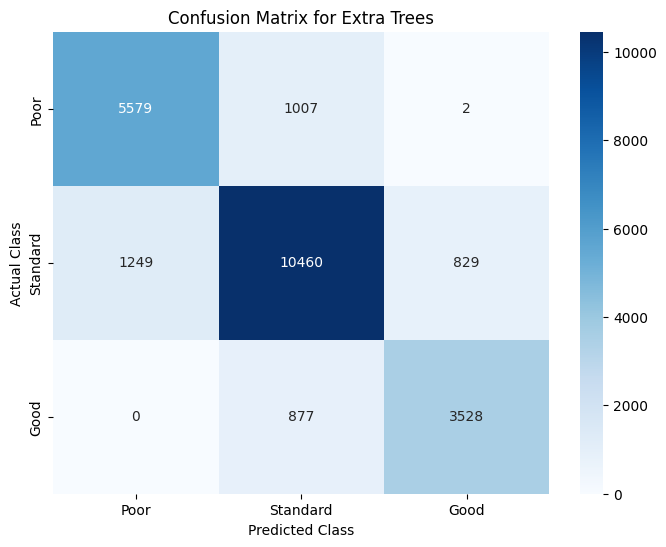

Classification Report for Extra Trees:
              precision    recall  f1-score   support

        Poor       0.82      0.85      0.83      6588
    Standard       0.85      0.83      0.84     12538
        Good       0.81      0.80      0.81      4405

    accuracy                           0.83     23531
   macro avg       0.82      0.83      0.83     23531
weighted avg       0.83      0.83      0.83     23531

Evaluating AdaBoost...


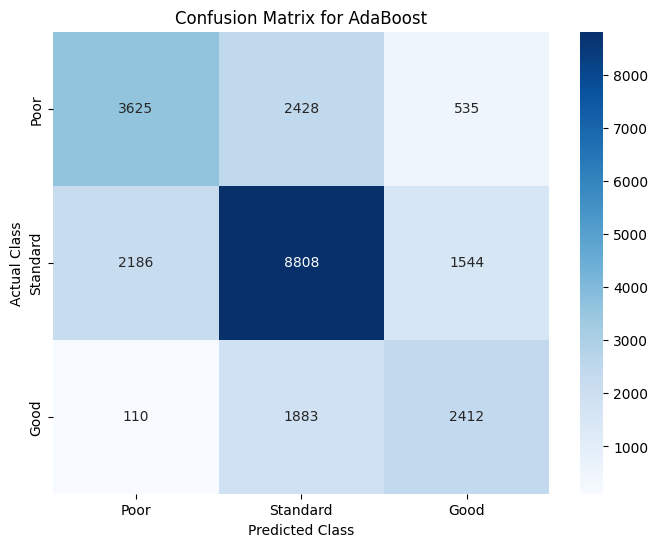

Classification Report for AdaBoost:
              precision    recall  f1-score   support

        Poor       0.61      0.55      0.58      6588
    Standard       0.67      0.70      0.69     12538
        Good       0.54      0.55      0.54      4405

    accuracy                           0.63     23531
   macro avg       0.61      0.60      0.60     23531
weighted avg       0.63      0.63      0.63     23531

Evaluating Gradient Boosting...


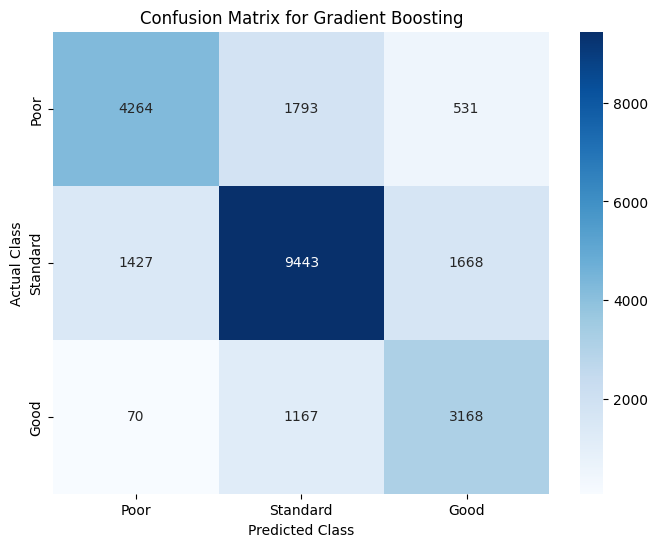

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

        Poor       0.74      0.65      0.69      6588
    Standard       0.76      0.75      0.76     12538
        Good       0.59      0.72      0.65      4405

    accuracy                           0.72     23531
   macro avg       0.70      0.71      0.70     23531
weighted avg       0.72      0.72      0.72     23531



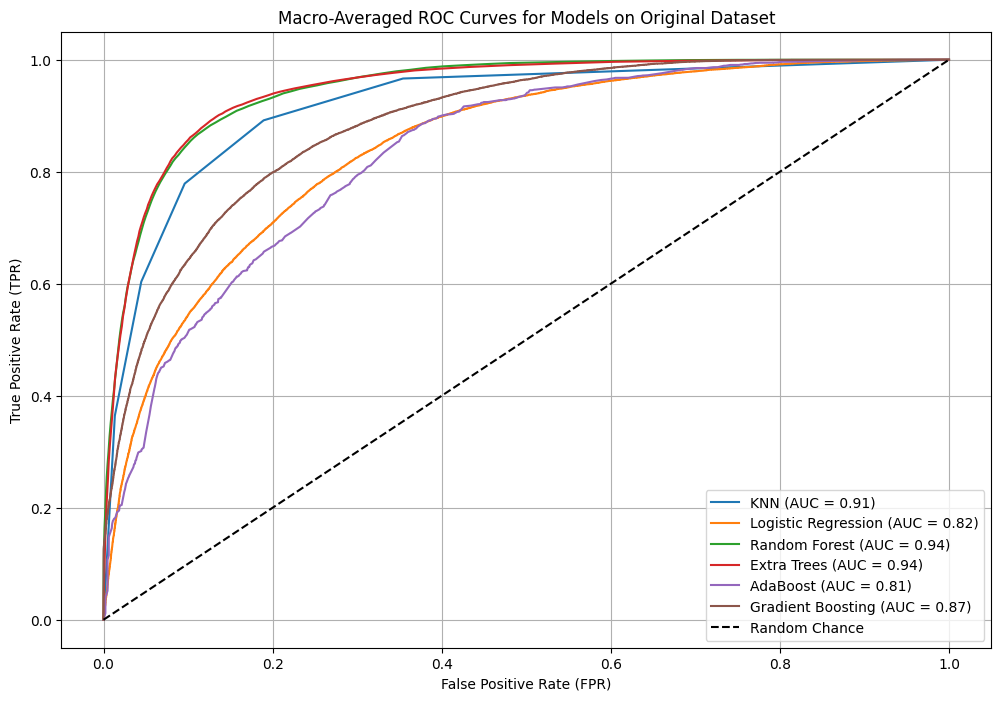

In [12]:

# Define models
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(max_iter=500, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Binarize the target (for multi-class ROC AUC)
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_train_bin.shape[1]

# Classes
classes = ['Poor', 'Standard', 'Good']

# Initialize a dictionary to store results
model_results = {}
roc_data = {}

# Evaluate each model
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    model.fit(X_train_scaled_df, y_train)
    y_pred = model.predict(X_test_scaled_df)
    y_prob = model.predict_proba(X_test_scaled_df)

    # Classification report
    report = classification_report(y_test, y_pred, target_names=classes, output_dict=True)
    model_results[model_name] = report

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.savefig(f"Confusion Matrix for {model_name}.png", dpi=300)
    plt.show()
    plt.close()

    # Macro-Averaged AUC-ROC
    macro_auc = roc_auc_score(y_test_bin, y_prob, average='macro', multi_class='ovr')
    roc_data[model_name] = {"probabilities": y_prob, "macro_auc": macro_auc}

    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred, target_names=classes))

# Plot Macro-Averaged ROC Curve
plt.figure(figsize=(12, 8))
for model_name, data in roc_data.items():
    y_prob = data["probabilities"]
    macro_auc = data["macro_auc"]

    # Compute macro-average ROC curve
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {macro_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Macro-Averaged ROC Curves for Models on Original Dataset')
plt.legend(loc='lower right')
plt.grid()
plt.savefig("macro_average_roc_baseline.png", dpi=300)
plt.show()
plt.close()

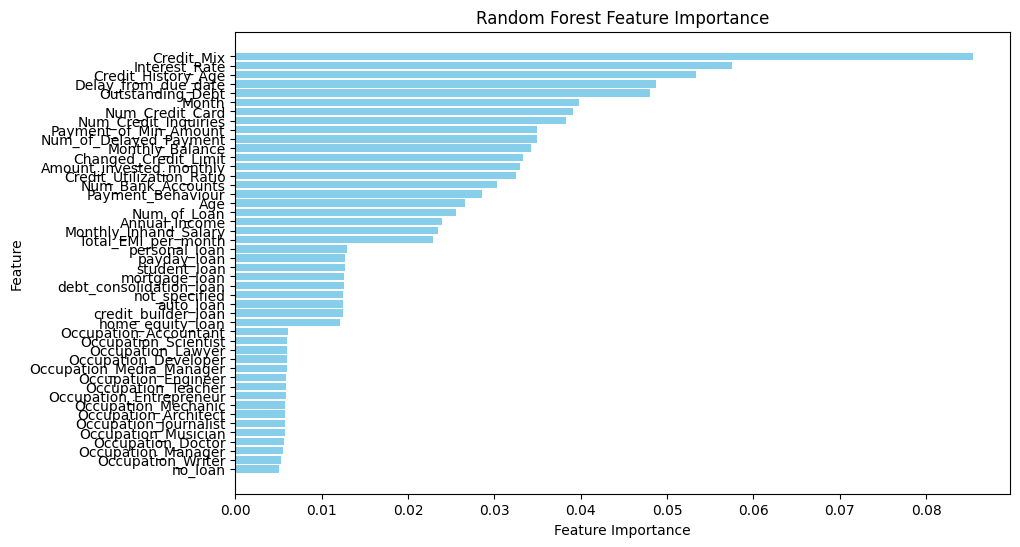

In [62]:

# Extract feature importance
feature_importance = models['Extra Trees'].feature_importances_
feature_names = X_train_scaled_df.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

In [13]:
# Find the best model based on F1-score and recall for "Poor"
best_model_name = None
best_poor_f1 = 0
best_poor_recall = 0

for model_name, report in model_results.items():
    poor_f1 = report['Poor']['f1-score']
    poor_recall = report['Poor']['recall']
    print(f"{model_name} - F1 (Poor): {poor_f1:.2f}, Recall (Poor): {poor_recall:.2f}")

    if poor_f1 > best_poor_f1:
        best_poor_f1 = poor_f1
        best_poor_recall = poor_recall
        best_model_name = model_name

print(f"\nBest Model for 'Poor': {best_model_name} with F1 = {best_poor_f1:.2f}, Recall = {best_poor_recall:.2f}")


KNN - F1 (Poor): 0.79, Recall (Poor): 0.82
Logistic Regression - F1 (Poor): 0.58, Recall (Poor): 0.52
Random Forest - F1 (Poor): 0.83, Recall (Poor): 0.84
Extra Trees - F1 (Poor): 0.83, Recall (Poor): 0.85
AdaBoost - F1 (Poor): 0.58, Recall (Poor): 0.55
Gradient Boosting - F1 (Poor): 0.69, Recall (Poor): 0.65

Best Model for 'Poor': Extra Trees with F1 = 0.83, Recall = 0.85


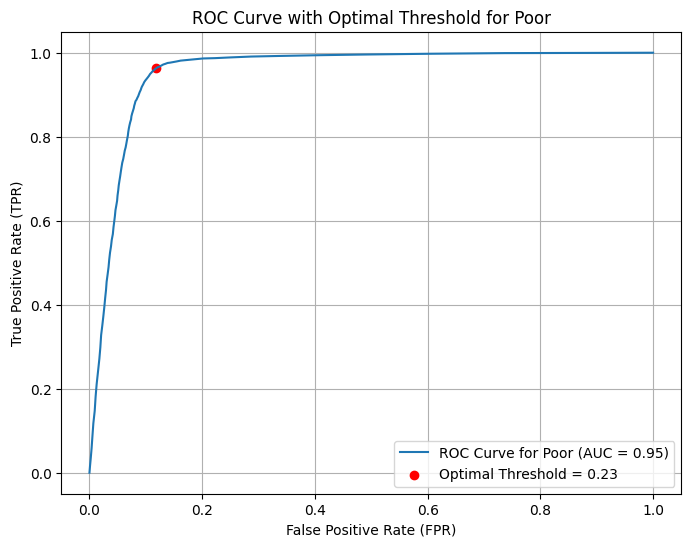

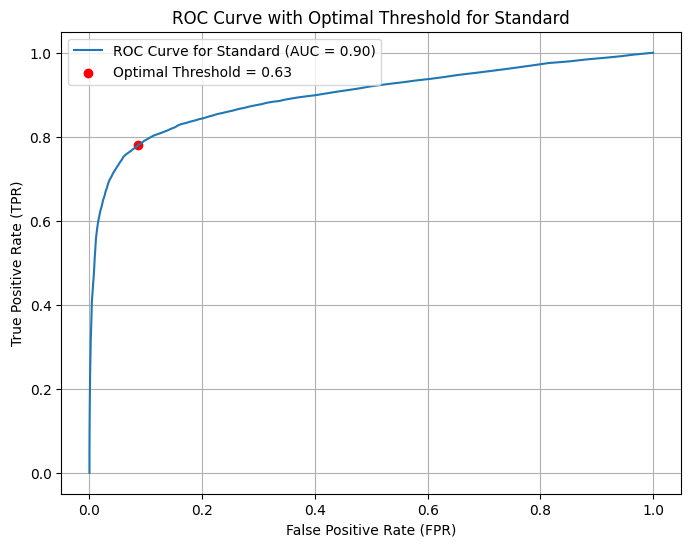

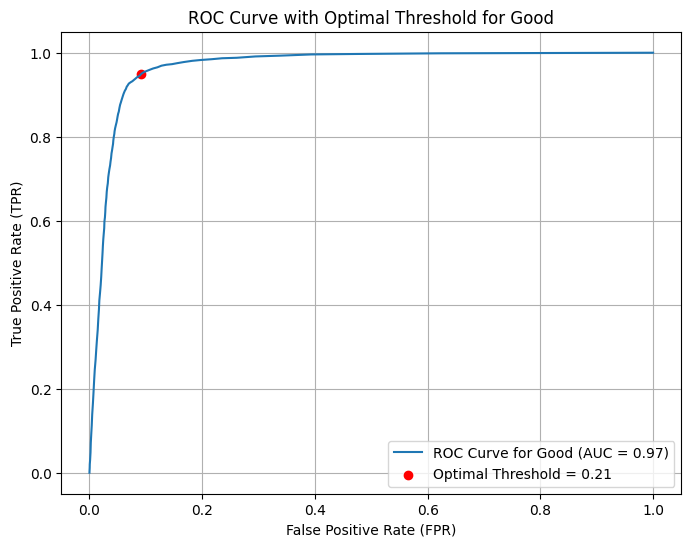

Optimal Thresholds for Each Class: {'Poor': 0.23, 'Standard': 0.63, 'Good': 0.21}
Debugging Metrics for 'Poor': TP=6341, FN=247, FP=1994, TN=14949
Recall (Poor): 0.9625, Precision (Poor): 0.7608, F1-Score (Poor): 0.8498
Classification Report (After Threshold Tuning):
              precision    recall  f1-score   support

        Poor       0.76      0.96      0.85      6588
    Standard       0.93      0.75      0.83     12538
        Good       0.77      0.90      0.83      4405

    accuracy                           0.84     23531
   macro avg       0.82      0.87      0.84     23531
weighted avg       0.85      0.84      0.84     23531

Confusion Matrix:
[[6341  237   10]
 [1988 9386 1164]
 [   6  434 3965]]
Manually Calculated Recall for 'Poor': 0.9625
Manually Calculated Precision for 'Poor': 0.7608


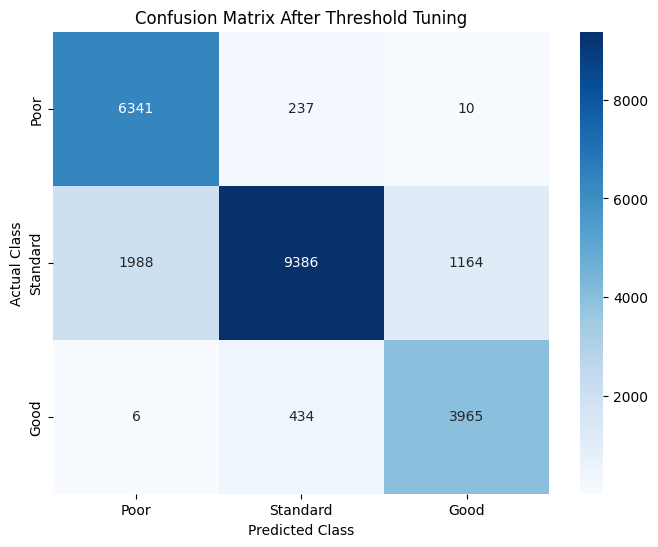

In [14]:
# Fit the best model and predict probabilities
best_model = models[best_model_name]
best_model.fit(X_train_scaled_df, y_train)

# Predict probabilities with the best model
y_prob = best_model.predict_proba(X_test_scaled_df)

# Tune thresholds for each class
optimal_thresholds = {}
for i, cls in enumerate(classes):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_prob[:, i])
    optimal_idx = np.argmax(tpr - fpr)  # Maximize TPR - FPR
    optimal_threshold = thresholds[optimal_idx]
    optimal_thresholds[cls] = optimal_threshold

    # Plot ROC curve with optimal threshold
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve for {cls} (AUC = {roc_auc_score(y_test_bin[:, i], y_prob[:, i]):.2f})')
    plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f'Optimal Threshold = {optimal_threshold:.2f}')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'ROC Curve with Optimal Threshold for {cls}')
    plt.legend()
    plt.grid()
    plt.savefig(f"ROC Curve - {cls}.png", dpi=300)
    plt.show()
    plt.close()

print("Optimal Thresholds for Each Class:", optimal_thresholds)

# Apply the tuned thresholds to make predictions
y_pred_tuned = []
for i in range(len(X_test_scaled_df)):
    class_probs = y_prob[i]
    assigned_class = None
    for cls_idx, cls in enumerate(classes):
        if class_probs[cls_idx] >= optimal_thresholds[cls]:
            assigned_class = cls_idx
            break
    if assigned_class is None:
        assigned_class = np.argmax(class_probs)  # Default to the highest probability class
    y_pred_tuned.append(assigned_class)

# Debugging Step: Recalculate Confusion Matrix Metrics for "Poor"
tp_poor = sum((np.array(y_pred_tuned) == 0) & (y_test == 0))
fn_poor = sum((np.array(y_pred_tuned) != 0) & (y_test == 0))
fp_poor = sum((np.array(y_pred_tuned) == 0) & (y_test != 0))
tn_poor = sum((np.array(y_pred_tuned) != 0) & (y_test != 0))

recall_poor_debug = tp_poor / (tp_poor + fn_poor)
precision_poor_debug = tp_poor / (tp_poor + fp_poor)
f1_poor_debug = 2 * (precision_poor_debug * recall_poor_debug) / (precision_poor_debug + recall_poor_debug)

print(f"Debugging Metrics for 'Poor': TP={tp_poor}, FN={fn_poor}, FP={fp_poor}, TN={tn_poor}")
print(f"Recall (Poor): {recall_poor_debug:.4f}, Precision (Poor): {precision_poor_debug:.4f}, F1-Score (Poor): {f1_poor_debug:.4f}")

# Confusion Matrix and Classification Report after Threshold Tuning
print("Classification Report (After Threshold Tuning):")
print(classification_report(y_test, y_pred_tuned, target_names=classes))

cm = confusion_matrix(y_test, y_pred_tuned, labels=[0, 1, 2])

# Double-check metrics derived from the confusion matrix
print("Confusion Matrix:")
print(cm)
print(f"Manually Calculated Recall for 'Poor': {cm[0, 0] / (cm[0, 0] + cm[0, 1] + cm[0, 2]):.4f}")
print(f"Manually Calculated Precision for 'Poor': {cm[0, 0] / (cm[0, 0] + cm[1, 0] + cm[2, 0]):.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix After Threshold Tuning")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.savefig("Confusion_Matrix_After_Threshold_Tuning_original.png", dpi=300)
plt.show()
plt.close()


## Feature Selection using RFE

In [21]:
# Drop the one-hot encoded occupation columns
occupation_cols = [col for col in X.columns if 'Occupation_' in col]
X_reduced = X.drop(columns=occupation_cols)

In [22]:
X_reduced.shape

(94123, 31)

In [23]:
# Split the dataset into training and testing sets (75:25 split)
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.25, random_state=42, stratify=y)

# List of skewed numerical features identified earlier
skewed_features = ['Annual_Income', 'Monthly_Inhand_Salary','Outstanding_Debt', 'Total_EMI_per_month','Monthly_Balance', 'Amount_invested_monthly']

# Initialize PowerTransformer for skewed features
pt = PowerTransformer(method='yeo-johnson')

# Apply PowerTransformer only on the training set, then transform the test set using the same parameters
X_train[skewed_features] = pt.fit_transform(X_train[skewed_features])
X_test[skewed_features] = pt.transform(X_test[skewed_features])

# Initialize StandardScaler for scaling
scaler = StandardScaler()

# Apply scaling to the entire training set, then transform the test set using the same parameters
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrames for usability
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [44]:
# Initialize Random Forest for RFE
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rfe = RFE(estimator=rf, n_features_to_select=21)
rfe.fit(X_train_scaled_df, y_train)

# Create a DataFrame to display rankings
feature_ranking = pd.DataFrame({
    'Feature': X_train_scaled_df.columns,
    'Ranking': rfe.ranking_,
    'Selected': rfe.support_  # Indicates whether the feature was selected (True/False)
})

# Sort by ranking
feature_ranking = feature_ranking.sort_values(by='Ranking', ascending=True)

# Display rankings
print("Feature Rankings:")
print(feature_ranking)

# Get selected features
selected_features = X_train_scaled_df.columns[rfe.support_]
print("Selected Features:", selected_features)

Feature Rankings:
                     Feature  Ranking  Selected
0                      Month        1      True
20           Monthly_Balance        1      True
19         Payment_Behaviour        1      True
18   Amount_invested_monthly        1      True
17       Total_EMI_per_month        1      True
16     Payment_of_Min_Amount        1      True
14  Credit_Utilization_Ratio        1      True
13          Outstanding_Debt        1      True
12                Credit_Mix        1      True
11      Num_Credit_Inquiries        1      True
15        Credit_History_Age        1      True
9     Num_of_Delayed_Payment        1      True
10      Changed_Credit_Limit        1      True
2              Annual_Income        1      True
3      Monthly_Inhand_Salary        1      True
4          Num_Bank_Accounts        1      True
1                        Age        1      True
6              Interest_Rate        1      True
7                Num_of_Loan        1      True
8        Delay_from_du

In [45]:
et = ExtraTreesClassifier(random_state=42, n_jobs=-1)
rfe = RFE(estimator=et, n_features_to_select=21)
rfe.fit(X_train_scaled_df, y_train)

# Create a DataFrame to display rankings
feature_ranking = pd.DataFrame({
    'Feature': X_train_scaled_df.columns,
    'Ranking': rfe.ranking_,
    'Selected': rfe.support_  # Indicates whether the feature was selected (True/False)
})

# Sort by ranking
feature_ranking = feature_ranking.sort_values(by='Ranking', ascending=True)

# Display rankings
print("Feature Rankings:")
print(feature_ranking)

# Get selected features
selected_features = X_train_scaled_df.columns[rfe.support_]
print("Selected Features:", selected_features)

Feature Rankings:
                     Feature  Ranking  Selected
0                      Month        1      True
20           Monthly_Balance        1      True
19         Payment_Behaviour        1      True
18   Amount_invested_monthly        1      True
17       Total_EMI_per_month        1      True
16     Payment_of_Min_Amount        1      True
14  Credit_Utilization_Ratio        1      True
13          Outstanding_Debt        1      True
12                Credit_Mix        1      True
11      Num_Credit_Inquiries        1      True
15        Credit_History_Age        1      True
9     Num_of_Delayed_Payment        1      True
10      Changed_Credit_Limit        1      True
2              Annual_Income        1      True
3      Monthly_Inhand_Salary        1      True
4          Num_Bank_Accounts        1      True
1                        Age        1      True
6              Interest_Rate        1      True
7                Num_of_Loan        1      True
8        Delay_from_du

In [46]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [47]:
X_train_selected.shape

(70592, 21)

Evaluating Random Forest...


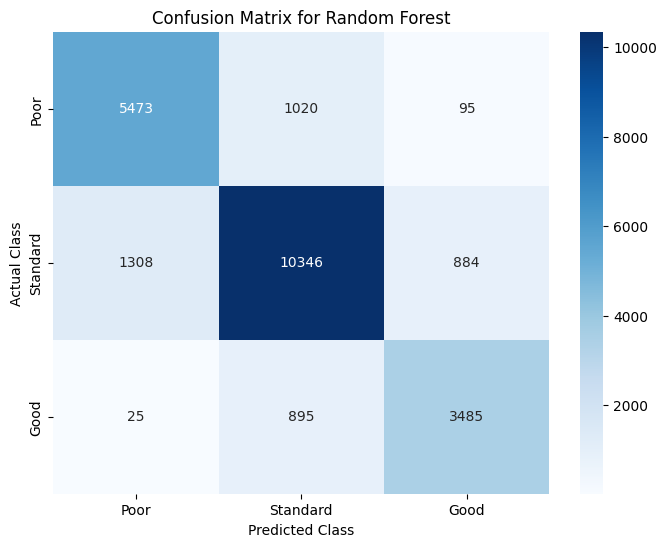

Classification Report for Random Forest:
              precision    recall  f1-score   support

        Poor       0.80      0.83      0.82      6588
    Standard       0.84      0.83      0.83     12538
        Good       0.78      0.79      0.79      4405

    accuracy                           0.82     23531
   macro avg       0.81      0.82      0.81     23531
weighted avg       0.82      0.82      0.82     23531

Evaluating Extra Trees...


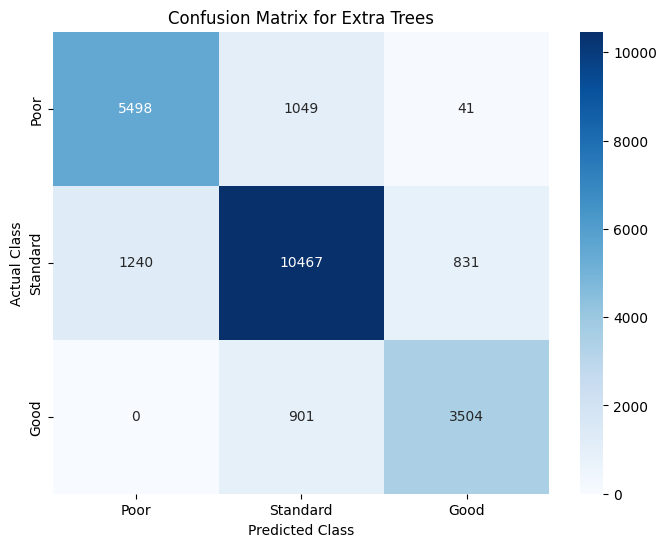

Classification Report for Extra Trees:
              precision    recall  f1-score   support

        Poor       0.82      0.83      0.83      6588
    Standard       0.84      0.83      0.84     12538
        Good       0.80      0.80      0.80      4405

    accuracy                           0.83     23531
   macro avg       0.82      0.82      0.82     23531
weighted avg       0.83      0.83      0.83     23531



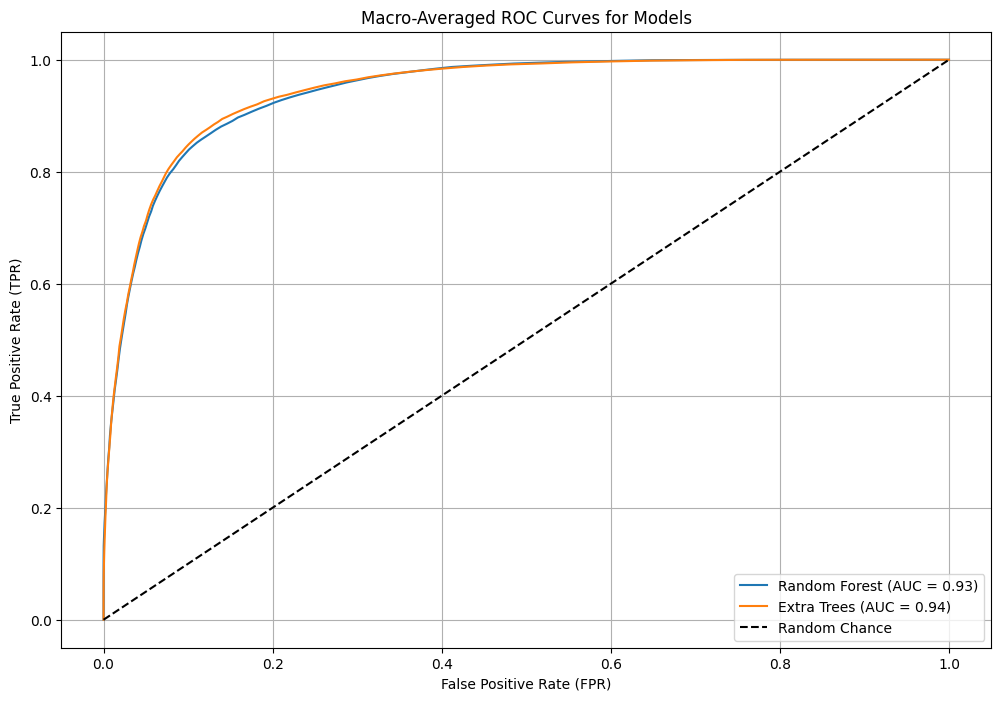

In [48]:
# Define models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=42, n_jobs=-1)
}

# Binarize the target (for multi-class ROC AUC)
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_train_bin.shape[1]

# Classes
classes = ['Poor', 'Standard', 'Good']

# Initialize a dictionary to store results
model_results = {}
roc_data = {}

# Evaluate each model
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    y_prob = model.predict_proba(X_test_selected)

    # Classification report
    report = classification_report(y_test, y_pred, target_names=classes, output_dict=True)
    model_results[model_name] = report

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.savefig(f"Confusion Matrix for {model_name}.png", dpi=300)
    plt.show()
    plt.close()

    # Macro-Averaged AUC-ROC
    macro_auc = roc_auc_score(y_test_bin, y_prob, average='macro', multi_class='ovr')
    roc_data[model_name] = {"probabilities": y_prob, "macro_auc": macro_auc}

    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred, target_names=classes))

# Plot Macro-Averaged ROC Curve
plt.figure(figsize=(12, 8))
for model_name, data in roc_data.items():
    y_prob = data["probabilities"]
    macro_auc = data["macro_auc"]

    # Compute macro-average ROC curve
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {macro_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Macro-Averaged ROC Curves for Models')
plt.legend(loc='lower right')
plt.grid()
plt.savefig("macro_average_roc.png", dpi=300)
plt.show()
plt.close()

In [49]:
# Find the best model based on F1-score and recall for "Poor"
best_model_name = None
best_poor_f1 = 0
best_poor_recall = 0

for model_name, report in model_results.items():
    poor_f1 = report['Poor']['f1-score']
    poor_recall = report['Poor']['recall']
    print(f"{model_name} - F1 (Poor): {poor_f1:.2f}, Recall (Poor): {poor_recall:.2f}")

    if poor_f1 > best_poor_f1:
        best_poor_f1 = poor_f1
        best_poor_recall = poor_recall
        best_model_name = model_name

print(f"\nBest Model for 'Poor': {best_model_name} with F1 = {best_poor_f1:.2f}, Recall = {best_poor_recall:.2f}")


Random Forest - F1 (Poor): 0.82, Recall (Poor): 0.83
Extra Trees - F1 (Poor): 0.83, Recall (Poor): 0.83

Best Model for 'Poor': Extra Trees with F1 = 0.83, Recall = 0.83


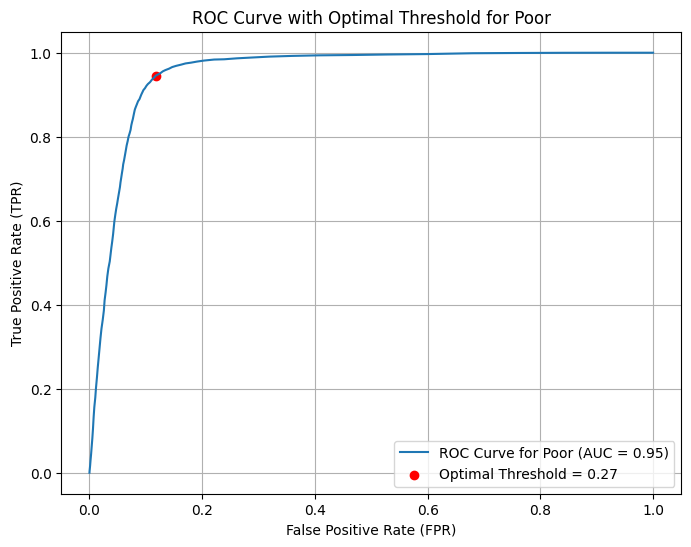

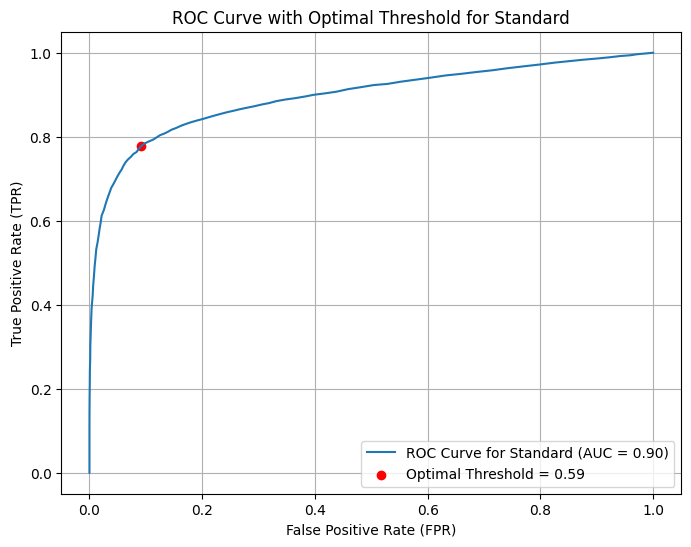

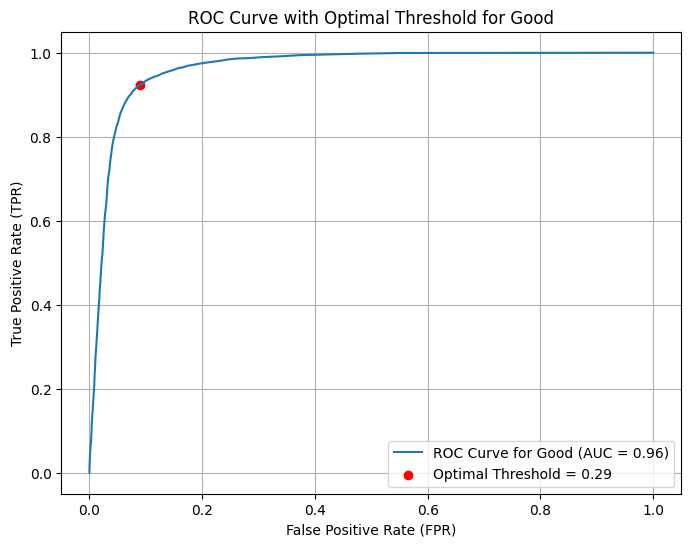

Optimal Thresholds for Each Class: {'Poor': np.float64(0.27), 'Standard': np.float64(0.59), 'Good': np.float64(0.29)}
Debugging Metrics for 'Poor': TP=6229, FN=359, FP=1995, TN=14948
Recall (Poor): 0.9455, Precision (Poor): 0.7574, F1-Score (Poor): 0.8411
Classification Report (After Threshold Tuning):
              precision    recall  f1-score   support

        Poor       0.76      0.95      0.84      6588
    Standard       0.92      0.75      0.82     12538
        Good       0.76      0.89      0.82      4405

    accuracy                           0.83     23531
   macro avg       0.81      0.86      0.83     23531
weighted avg       0.84      0.83      0.83     23531

Confusion Matrix:
[[6229  319   40]
 [1970 9354 1214]
 [  25  474 3906]]
Manually Calculated Recall for 'Poor': 0.9455
Manually Calculated Precision for 'Poor': 0.7574


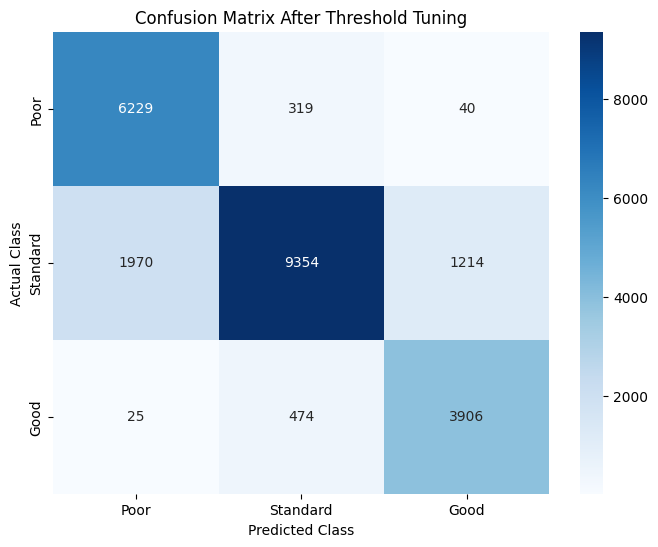

In [50]:
# Fit the best model and predict probabilities
best_model = models[best_model_name]
best_model.fit(X_train_selected, y_train)

# Predict probabilities with the best model
y_prob = best_model.predict_proba(X_test_selected)

# Tune thresholds for each class
optimal_thresholds = {}
for i, cls in enumerate(classes):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_prob[:, i])
    optimal_idx = np.argmax(tpr - fpr)  # Maximize TPR - FPR
    optimal_threshold = thresholds[optimal_idx]
    optimal_thresholds[cls] = optimal_threshold

    # Plot ROC curve with optimal threshold
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve for {cls} (AUC = {roc_auc_score(y_test_bin[:, i], y_prob[:, i]):.2f})')
    plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f'Optimal Threshold = {optimal_threshold:.2f}')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'ROC Curve with Optimal Threshold for {cls}')
    plt.legend()
    plt.grid()
    plt.savefig(f"ROC Curve - {cls}.png", dpi=300)
    plt.show()
    plt.close()

print("Optimal Thresholds for Each Class:", optimal_thresholds)

# Apply the tuned thresholds to make predictions
y_pred_tuned = []
for i in range(len(X_test_selected)):
    class_probs = y_prob[i]
    assigned_class = None
    for cls_idx, cls in enumerate(classes):
        if class_probs[cls_idx] >= optimal_thresholds[cls]:
            assigned_class = cls_idx
            break
    if assigned_class is None:
        assigned_class = np.argmax(class_probs)  # Default to the highest probability class
    y_pred_tuned.append(assigned_class)

# Debugging Step: Recalculate Confusion Matrix Metrics for "Poor"
tp_poor = sum((np.array(y_pred_tuned) == 0) & (y_test == 0))
fn_poor = sum((np.array(y_pred_tuned) != 0) & (y_test == 0))
fp_poor = sum((np.array(y_pred_tuned) == 0) & (y_test != 0))
tn_poor = sum((np.array(y_pred_tuned) != 0) & (y_test != 0))

recall_poor_debug = tp_poor / (tp_poor + fn_poor)
precision_poor_debug = tp_poor / (tp_poor + fp_poor)
f1_poor_debug = 2 * (precision_poor_debug * recall_poor_debug) / (precision_poor_debug + recall_poor_debug)

print(f"Debugging Metrics for 'Poor': TP={tp_poor}, FN={fn_poor}, FP={fp_poor}, TN={tn_poor}")
print(f"Recall (Poor): {recall_poor_debug:.4f}, Precision (Poor): {precision_poor_debug:.4f}, F1-Score (Poor): {f1_poor_debug:.4f}")

# Confusion Matrix and Classification Report after Threshold Tuning
print("Classification Report (After Threshold Tuning):")
print(classification_report(y_test, y_pred_tuned, target_names=classes))

cm = confusion_matrix(y_test, y_pred_tuned, labels=[0, 1, 2])

# Double-check metrics derived from the confusion matrix
print("Confusion Matrix:")
print(cm)
print(f"Manually Calculated Recall for 'Poor': {cm[0, 0] / (cm[0, 0] + cm[0, 1] + cm[0, 2]):.4f}")
print(f"Manually Calculated Precision for 'Poor': {cm[0, 0] / (cm[0, 0] + cm[1, 0] + cm[2, 0]):.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix After Threshold Tuning")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.savefig("Confusion Matrix After Threshold Tuning.png", dpi=300)
plt.show()
plt.close()
